# EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import librosa

sns.set_context("talk")

In [2]:
data_path = '../data/input/'
train = pd.read_csv(data_path + 'train.csv')
train.head()

,fname,label,manually_verified
0,00044347.wav,Hi-hat,0
1,001ca53d.wav,Saxophone,1
2,002d256b.wav,Trumpet,0
3,0033e230.wav,Glockenspiel,1
4,00353774.wav,Cello,1


## Audio Length

In [17]:
audio_lengths = []
for fname in train.fname.tolist():
    filepath = data_path + 'audio_train/' + fname
    data, _ = librosa.core.load(filepath,
                                sr=44100,
                                res_type='kaiser_fast')
    audio_length = len(data)/44100
    audio_lengths.append(audio_length)
    

In [66]:
import statistics

median = statistics.median(audio_lengths)
mean = 6.78

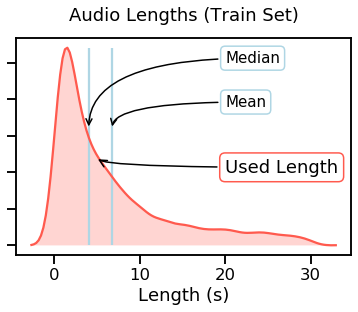

In [93]:
#plt.figure(figsize=(15, 10))
ax = plt.axes()
sns.kdeplot(audio_lengths, shade=True, color='#FF5A4E', ax=ax)
plt.vlines([median, mean], 0, 0.135, color='#AFD6E4')
plt.title('Audio Lengths (Train Set)', y=1.05)
plt.xlabel('Length (s)')
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.annotate('Median', xy=(median, 0.08), xytext=(20, 0.125), fontsize=15,
            bbox=dict(boxstyle="round", fc="none", ec='#AFD6E4'),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));
ax.annotate('Mean', xy=(mean, 0.08), xytext=(20, 0.095), fontsize=15,
            bbox=dict(boxstyle="round", fc="none", ec='#AFD6E4'),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));
ax.annotate('Used Length', xy=(5, 0.06), xytext=(20, 0.05),
            bbox=dict(boxstyle="round", fc="none", ec='#FF5A4E'),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

## Data Splitting

In [3]:
train['manually_verified'].value_counts()/len(train)*100

0    60.83606
1    39.16394
Name: manually_verified, dtype: float64

Text(0.5, 1.0, '')

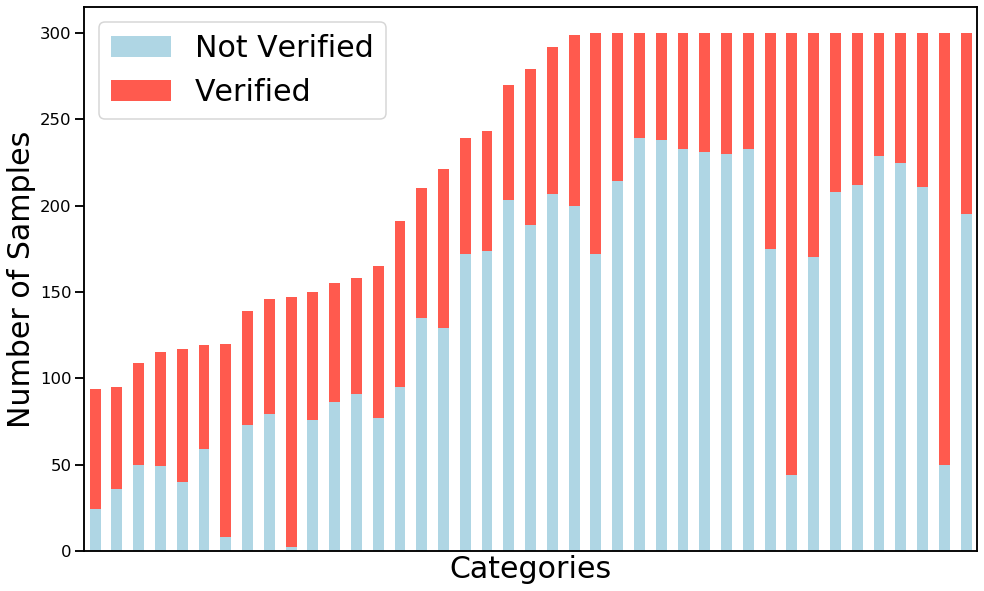

In [6]:
ax = plt.axes()
category_group = train.groupby(['label', 'manually_verified']).count()
plot = category_group.unstack().reindex(category_group.unstack().sum(axis=1).sort_values().index)\
          .plot(kind='bar', stacked=True, title="Number of Audio Samples per Category", figsize=(16,10), ax=ax,
               colors = ['#AFD6E4', '#FF5A4E'])
ax.xaxis.set_major_locator(plt.NullLocator())
ax.set_xlabel("Categories", fontsize=30)
ax.set_ylabel("Number of Samples", fontsize=30);
plt.legend(['Not Verified', 'Verified'], fontsize=30)
plt.title("")